In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
df = pd.read_csv('sample_data.csv')

In [4]:
len(df)

6539

In [5]:
df.columns.tolist()

['entity',
 'formattype',
 'fromdate',
 'titlecount',
 'titles',
 'todate',
 'author',
 'amazontotalreviews',
 'minappleprice',
 'amazontotalrevenue',
 'accruedpreordersoldunits',
 'amazonlumpedpreordersubscriptionrevenue',
 'preordersalesrevenue',
 'foundatamazon',
 'barnesandnobleaccruedpreorderrevenue',
 'amazonpreordersubscriptionunits',
 'amazonlumpedpreordersalesrevenue',
 'foundatbarnesandnoble',
 'maxprice',
 'lumpedpreordersubscriptionunits',
 'applepreorderrevenue',
 'amazontotalunits',
 'totalrevenue',
 'barnesandnobleaccruedpreorderunits',
 'preorderunits',
 'amazonsubscriptionrevenue',
 'amazonlumpedpreorderrevenue',
 'maxbarnesandnoblelistprice',
 'maxlistprice',
 'barnesandnoblesoldunits',
 'maxapplelistprice',
 'amazonaccruedpreordersubscriptionrevenue',
 'accruedpreordersubscriptionunits',
 'amazonkenpread',
 'applesoldunits',
 'minamazonlistprice',
 'minprice',
 'bookscanreported',
 'appleaccruedpreorderunits',
 'preorderperiod',
 'datepublished',
 'lumpedpreordersold

In [6]:
df.describe()

,fromdate,titlecount,todate,amazontotalreviews,minappleprice,amazontotalrevenue,accruedpreordersoldunits,amazonlumpedpreordersubscriptionrevenue,preordersalesrevenue,foundatamazon,...,preorderrevenue,pubtrackreported,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher
count,6.539000e+03,6539.000000,6.539000e+03,6522.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.000000,6539.000000,...,6539.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.0,6539.000000,6539.000000,2558.000000,1531.0
mean,2.018078e+07,1.599174,2.018080e+07,242.896044,118.859459,18074.906866,0.235204,0.0,155.503288,0.998165,...,155.503288,0.984095,155.503288,17.666004,0.0,0.0,155.503288,118.859459,336.532447,1.0
std,7.319859e+03,0.748654,7.321285e+03,57.042772,323.464108,30999.078107,2.776806,0.0,8769.366153,0.042803,...,8769.366153,0.125116,8769.366153,36.272170,0.0,0.0,8769.366153,323.464108,42.531144,0.0
min,2.017040e+07,1.000000,2.017040e+07,120.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,305.000000,1.0
25%,2.017121e+07,1.000000,2.017121e+07,200.000000,0.000000,1998.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,320.000000,1.0
50%,2.018071e+07,1.000000,2.018071e+07,250.000000,0.000000,7191.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,6.000000,0.0,0.0,0.000000,0.000000,321.000000,1.0
75%,2.019013e+07,2.000000,2.019013e+07,283.000000,0.000000,17982.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,13.000000,0.0,0.0,0.000000,0.000000,321.000000,1.0
max,2.019083e+07,4.000000,2.019083e+07,331.000000,999.000000,571692.000000,82.000000,0.0,501420.000000,1.000000,...,501420.000000,1.000000,501420.000000,781.000000,0.0,0.0,501420.000000,999.000000,496.000000,1.0


In [7]:
not_null_values = []
for col in df.columns:
    tmp = df[col].isnull().sum()
    if tmp != 0: not_null_values.append((col,tmp))
    print(col,tmp)    

entity 0
formattype 0
fromdate 0
titlecount 0
titles 0
todate 0
author 0
amazontotalreviews 17
minappleprice 0
amazontotalrevenue 0
accruedpreordersoldunits 0
amazonlumpedpreordersubscriptionrevenue 0
preordersalesrevenue 0
foundatamazon 0
barnesandnobleaccruedpreorderrevenue 0
amazonpreordersubscriptionunits 0
amazonlumpedpreordersalesrevenue 0
foundatbarnesandnoble 0
maxprice 0
lumpedpreordersubscriptionunits 0
applepreorderrevenue 0
amazontotalunits 0
totalrevenue 0
barnesandnobleaccruedpreorderunits 0
preorderunits 0
amazonsubscriptionrevenue 0
amazonlumpedpreorderrevenue 0
maxbarnesandnoblelistprice 0
maxlistprice 0
barnesandnoblesoldunits 0
maxapplelistprice 0
amazonaccruedpreordersubscriptionrevenue 0
accruedpreordersubscriptionunits 0
amazonkenpread 0
applesoldunits 0
minamazonlistprice 0
minprice 0
bookscanreported 0
appleaccruedpreorderunits 0
preorderperiod 0
datepublished 0
lumpedpreordersoldunits 0
accruedpreorderrevenue 0
maxamazonlistprice 0
amazonaccruedpreorderrevenue 

In [8]:
not_null_values

[('amazontotalreviews', 17),
 ('amazonaveragerating', 16),
 ('amazoncategories', 5),
 ('formats', 1),
 ('pagelength', 3981),
 ('pricewassetbypublisher', 5008),
 ('barnesandnobledistributor', 4804),
 ('appledistributor', 5783)]

In [9]:
df_null_entries = df[[item[0] for item in not_null_values]]

In [10]:
df_null_entries.head(10)

,amazontotalreviews,amazonaveragerating,amazoncategories,formats,pagelength,pricewassetbypublisher,barnesandnobledistributor,appledistributor
0,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
1,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
2,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
3,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
4,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
5,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
6,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
7,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
8,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
9,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN


In [11]:
df_null_entries.describe()

,amazontotalreviews,amazonaveragerating,pagelength,pricewassetbypublisher
count,6522.000000,6523.000000,2558.000000,1531.0
mean,242.896044,453.302162,336.532447,1.0
std,57.042772,13.736645,42.531144,0.0
min,120.000000,410.000000,305.000000,1.0
25%,200.000000,440.000000,320.000000,1.0
50%,250.000000,460.000000,321.000000,1.0
75%,283.000000,470.000000,321.000000,1.0
max,331.000000,470.000000,496.000000,1.0


In [12]:
"""
Amazon Total Reviews: Replace Null by Mean
Amazon Average Rating: Replace Null by Mode
Page Length: Replace Null by Mean
Price Was Set By Publisher: Replace Null by Mean
Barnes and Noble Distributor: Replace by Mode
Apple Distributor: Replace by Mode
Amazon Category: Replace by Unique values according to unique authors
Formats: Replace by Mode
"""

'\nAmazon Total Reviews: Replace Null by Mean\nAmazon Average Rating: Replace Null by Mode\nPage Length: Replace Null by Mean\nPrice Was Set By Publisher: Replace Null by Mean\nBarnes and Noble Distributor: Replace by Mode\nApple Distributor: Replace by Mode\nAmazon Category: Replace by Unique values according to unique authors\nFormats: Replace by Mode\n'

In [13]:
df['amazontotalreviews'].fillna(df['amazontotalreviews'].mean(), inplace=True)
df['amazonaveragerating'].fillna(df['amazonaveragerating'].mode().iloc[0], inplace=True)
df['pagelength'].fillna(df['pagelength'].mean(), inplace=True)
df['pricewassetbypublisher'].fillna(df['pricewassetbypublisher'].mean(), inplace=True)
df['barnesandnobledistributor'].fillna(df['barnesandnobledistributor'].mode().iloc[0], inplace=True)
df['appledistributor'].fillna(df['appledistributor'].mode().iloc[0], inplace=True)
df['formats'].fillna(df['formats'].mode().iloc[0], inplace=True)
df['amazoncategories'].fillna(df['amazoncategories'].mode().iloc[0], inplace=True)

In [14]:
#df[df['amazoncategories'].isnull()].index.to_list()

Text(0.5, 1.0, 'Authors vs Preorder Sale Revenue')

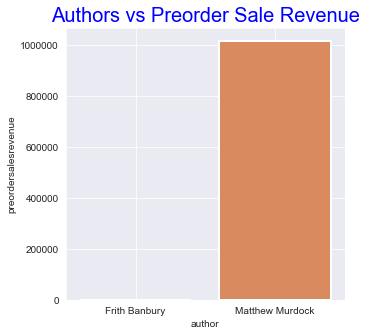

In [15]:
# Author vs Preorder Sale Revenue
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
authors = df.groupby('author')['preordersalesrevenue'].sum().reset_index()
authors['author'] = authors['author'].astype(object)
authors['preordersalesrevenue'] = authors['preordersalesrevenue'].astype(int)
sns.barplot(authors['author'], authors['preordersalesrevenue'],  linewidth = 2,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Preorder Sale Revenue", color='b', fontsize = 20, loc = 'center' )

Text(0.5, 1.0, 'Authors vs Title Count')

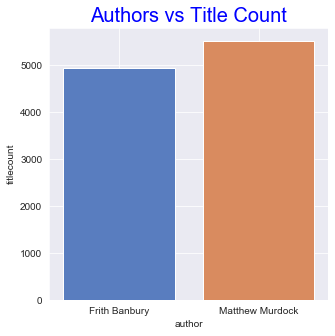

In [16]:
# Author vs Title Count
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
title_count = df.groupby('author')['titlecount'].sum().reset_index()
title_count['author'] = title_count['author'].astype(object)
title_count['titlecount'] = title_count['titlecount'].astype(int)
sns.barplot(title_count['author'], title_count['titlecount'],  linewidth = 1,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Title Count", color='b', fontsize = 20, loc = 'center' )

Text(0.5, 1.0, 'Authors vs Found at Amazon')

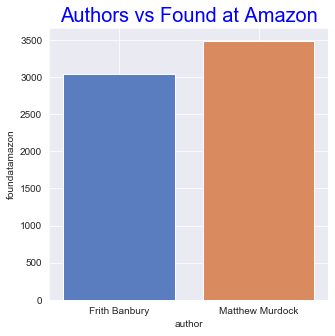

In [17]:
# Author vs Found at Amazon
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
fd_amazon = df.groupby('author')['foundatamazon'].sum().reset_index()
fd_amazon['author'] = fd_amazon['author'].astype(object)
fd_amazon['foundatamazon'] = fd_amazon['foundatamazon'].astype(int)
sns.barplot(fd_amazon['author'], fd_amazon['foundatamazon'],  linewidth = 1,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Found at Amazon", color='b', fontsize = 20, loc = 'center')

Text(0.5, 1.0, 'Authors vs Barnes and Noble')

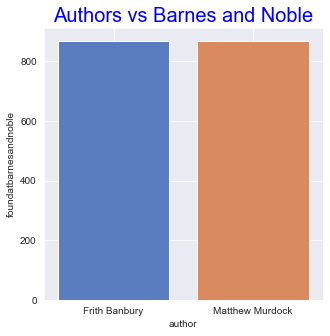

In [18]:
# Author vs Found at Barnes and Noble
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
fd_BandA = df.groupby('author')['foundatbarnesandnoble'].sum().reset_index()
fd_BandA['author'] = fd_BandA['author'].astype(object)
fd_BandA['foundatbarnesandnoble'] = fd_BandA['foundatbarnesandnoble'].astype(int)
sns.barplot(fd_BandA['author'], fd_BandA['foundatbarnesandnoble'],  linewidth = 1,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Barnes and Noble", color='b', fontsize = 20, loc = 'center')

In [19]:
"""category = df['amazoncategories'].value_counts()
#author = df['author'].value_counts()
#df_cat_aut = pd.concat([category,author])
category.plot(y='amazon categories',kind="bar",figsize=(10, 10), width=1)"""

'category = df[\'amazoncategories\'].value_counts()\n#author = df[\'author\'].value_counts()\n#df_cat_aut = pd.concat([category,author])\ncategory.plot(y=\'amazon categories\',kind="bar",figsize=(10, 10), width=1)'

In [20]:
df['amazoncategories'].unique().shape

(36,)

Text(0.5, 1.0, 'Authors vs Amazon Total Review')

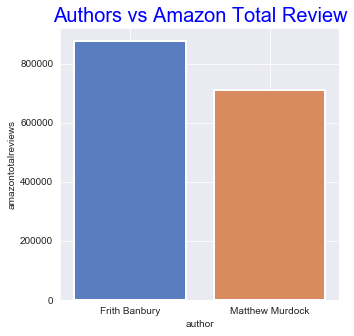

In [21]:
# Author vs Amazon Total Review
plt.figure(figsize = (5,5))
#sns.set_style("darkgrid")
amazon_review = df.groupby('author')['amazontotalreviews'].sum().reset_index()
amazon_review['author'] = amazon_review['author'].astype(object)
amazon_review['amazontotalreviews'] = amazon_review['amazontotalreviews'].astype(int)
sns.barplot(amazon_review['author'], amazon_review['amazontotalreviews'],  linewidth = 2,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Amazon Total Review", color='b', fontsize = 20, loc = 'center' )

<Figure size 360x360 with 0 Axes>

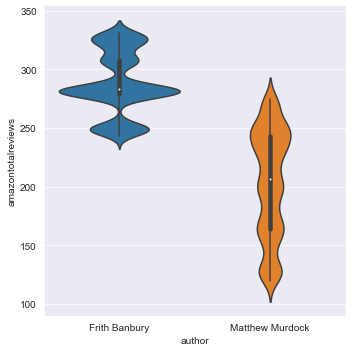

In [22]:
plt.figure(figsize = (5,5))
sns.catplot(x='author', y='amazontotalreviews', kind = 'violin', data=df)

In [23]:
df['amazontotalreviews'].describe()

count    6539.000000
mean      242.896044
std        56.968563
min       120.000000
25%       200.000000
50%       250.000000
75%       283.000000
max       331.000000
Name: amazontotalreviews, dtype: float64

In [24]:
"""plt.figure(figsize = (20,10))
sns.catplot( y='amazontotalreviews', x='amazontotalrevenue', kind = 'box', data=df)"""

"plt.figure(figsize = (20,10))\nsns.catplot( y='amazontotalreviews', x='amazontotalrevenue', kind = 'box', data=df)"

In [25]:
df['publisherparent'].unique()

array(['Simon & Schuster', 'Pocket',
       'Simon & Schuster Audio and Blackstone Audio'], dtype=object)

In [26]:
df['publishertype'].unique()

array(['bigfive', 'uncategorizedmanyauthor'], dtype=object)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

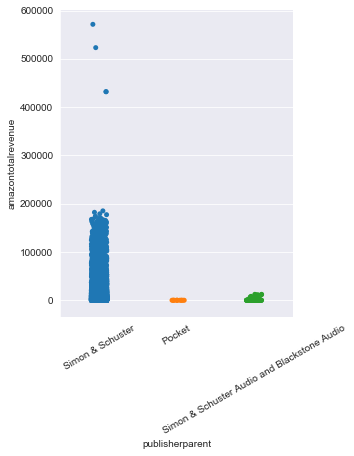

In [27]:
plt.figure(figsize = (20,10))
sns.catplot(x='publisherparent', y='amazontotalrevenue', kind = 'strip', data=df)
plt.xticks(rotation=30)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

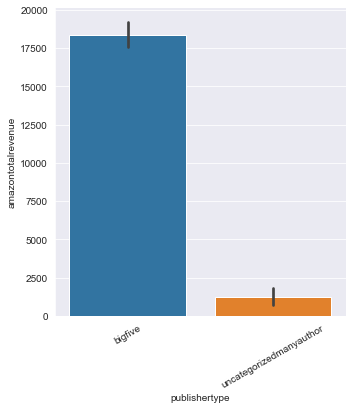

In [28]:
plt.figure(figsize = (20,10))
sns.catplot(x='publishertype', y='amazontotalrevenue', kind = 'bar', data=df)
plt.xticks(rotation=30)

In [29]:
#correlation = df.corr()

In [30]:
#sns.heatmap(correlation)

In [31]:
#df.select_dtypes(include=['object'])
#df.columns.get_loc()

In [32]:
df.select_dtypes(include=['object'])

,entity,formattype,titles,author,datepublished,publishertype,amazoncategories,publisherparent,formats,barnesandnobledistributor,appledistributor
0,Alone in the dark,print,"{'amazontotalreviews': 306, 'minappleprice': 0...",Frith Banbury,2009-05-12,bigfive,Books > Books on CD > Mystery & Thrillers ; Bo...,Simon & Schuster,Audio CD,SIMON & SCHUSTER,SIMON AND SCHUSTER DIGITAL SALES INC
1,Alone in the dark,print,"{'amazontotalreviews': 306, 'minappleprice': 0...",Frith Banbury,2009-05-12,bigfive,Books > Books on CD > Mystery & Thrillers ; Bo...,Simon & Schuster,Audio CD,SIMON & SCHUSTER,SIMON AND SCHUSTER DIGITAL SALES INC
2,Alone in the dark,print,"{'amazontotalreviews': 306, 'minappleprice': 0...",Frith Banbury,2009-05-12,bigfive,Books > Books on CD > Mystery & Thrillers ; Bo...,Simon & Schuster,Audio CD,SIMON & SCHUSTER,SIMON AND SCHUSTER DIGITAL SALES INC
3,Alone in the dark,print,"{'amazontotalreviews': 306, 'minappleprice': 0...",Frith Banbury,2009-05-12,bigfive,Books > Books on CD > Mystery & Thrillers ; Bo...,Simon & Schuster,Audio CD,SIMON & SCHUSTER,SIMON AND SCHUSTER DIGITAL SALES INC
4,Alone in the dark,print,"{'amazontotalreviews': 306, 'minappleprice': 0...",Frith Banbury,2009-05-12,bigfive,Books > Books on CD > Mystery & Thrillers ; Bo...,Simon & Schuster,Audio CD,SIMON & SCHUSTER,SIMON AND SCHUSTER DIGITAL SALES INC
...,...,...,...,...,...,...,...,...,...,...,...
6534,The Walking Dead,audio,"{'amazontotalreviews': 275, 'minappleprice': 0...",Matthew Murdock,2015-09-29,bigfive,Books > Teens > Literature & Fiction > Social ...,Simon & Schuster,Audible Audiobook,SIMON & SCHUSTER,SIMON AND SCHUSTER DIGITAL SALES INC
6535,The Walking Dead,audio,"{'amazontotalreviews': 275, 'minappleprice': 0...",Matthew Murdock,2015-09-29,bigfive,Books > Teens > Literature & Fiction > Social ...,Simon & Schuster,Audible Audiobook,SIMON & SCHUSTER,SIMON AND SCHUSTER DIGITAL SALES INC
6536,The Walking Dead,audio,"{'amazontotalreviews': 275, 'minappleprice': 0...",Matthew Murdock,2015-09-29,bigfive,Books > Teens > Literature & Fiction > Social ...,Simon & Schuster,Audible Audiobook,SIMON & SCHUSTER,SIMON AND SCHUSTER DIGITAL SALES INC
6537,The Walking Dead,audio,"{'amazontotalreviews': 275, 'minappleprice': 0...",Matthew Murdock,2015-09-29,bigfive,Books > Teens > Literature & Fiction > Social ...,Simon & Schuster,Audible Audiobook,SIMON & SCHUSTER,SIMON AND SCHUSTER DIGITAL SALES INC


In [33]:
#df.columns.get_loc(['entity','formattype','titles','author','datepublished','publishertype','amazoncategories',
                    #'publisherparent','formats','barnesandnobledistributor','appledistributor'])
    
[df.columns.get_loc(col) for col in df.select_dtypes(include=['object'])]

[0, 1, 4, 6, 40, 57, 61, 70, 78, 104, 105]

In [34]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df.iloc[:,0] = lb.fit_transform(df.iloc[:,0]).astype('float64')
df.iloc[:,1] = lb.fit_transform(df.iloc[:,1]).astype('float64')
df.iloc[:,4] = lb.fit_transform(df.iloc[:,4]).astype('float64')
df.iloc[:,6] = lb.fit_transform(df.iloc[:,6]).astype('float64')
df.iloc[:,40] = lb.fit_transform(df.iloc[:,40]).astype('float64')
df.iloc[:,57] = lb.fit_transform(df.iloc[:,57]).astype('float64')
df.iloc[:,61] = lb.fit_transform(df.iloc[:,61]).astype('float64')
df.iloc[:,70] = lb.fit_transform(df.iloc[:,70]).astype('float64')
df.iloc[:,78] = lb.fit_transform(df.iloc[:,78]).astype('float64')
df.iloc[:,104] = lb.fit_transform(df.iloc[:,104]).astype('float64')
df.iloc[:,105] = lb.fit_transform(df.iloc[:,105]).astype('float64')

In [35]:
#correlation = df.corr()

In [36]:
"""plt.figure(figsize =(25,25))
sns.heatmap(df[correlation.index].corr(),cmap="RdYlGn",linewidths=1.0)
#sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)"""

'plt.figure(figsize =(25,25))\nsns.heatmap(df[correlation.index].corr(),cmap="RdYlGn",linewidths=1.0)\n#sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)'

In [37]:
"""columns = np.full((correlation.shape[0],), True, dtype=bool)
#print(columns_copy.shape)
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
#print(columns.shape)

columns_to_consider = df.columns[columns]

df = df[columns_to_consider]
print(len(df))"""

'columns = np.full((correlation.shape[0],), True, dtype=bool)\n#print(columns_copy.shape)\nfor i in range(correlation.shape[0]):\n    for j in range(i+1, correlation.shape[0]):\n        if correlation.iloc[i,j] >= 0.9:\n            if columns[j]:\n                columns[j] = False\n#print(columns.shape)\n\ncolumns_to_consider = df.columns[columns]\n\ndf = df[columns_to_consider]\nprint(len(df))'

In [38]:
#df.shape

In [39]:
#df.columns

In [40]:
#df['amazoncategories'].unique().shape[0]

In [41]:
y = df['totalrevenue'].values
X = df.drop('totalrevenue',axis=1)
#X = df.iloc[:,:].values
print("Shape of X is:", X.shape)
print("Shape of y is:", y.shape)

Shape of X is: (6539, 105)
Shape of y is: (6539,)


In [42]:
#X.shape

In [43]:
#X_train_cc, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, shuff, random_state=27)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**** TRAINING INFORMATION ****
Training Accuracy:  0.9972341947439064
[1.23265766e-09 1.14504151e-06 5.93881683e-04 1.33284603e-07
 7.14067317e-04 3.89564782e-05 1.96948172e-09 4.61448114e-06
 7.46333157e-07 3.14199052e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.39185488e-13 1.12612857e-07 1.47633863e-06 0.00000000e+00
 0.00000000e+00 6.65276549e-05 0.00000000e+00 0.00000000e+00
 4.34778806e-04 7.63409928e-13 0.00000000e+00 7.51595188e-07
 7.82348577e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.45551612e-04 1.22827038e-06 9.56087675e-05
 1.05430829e-07 0.00000000e+00 0.00000000e+00 2.05264631e-07
 0.00000000e+00 0.00000000e+00 2.37350083e-05 0.00000000e+00
 0.00000000e+00 8.68408851e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.92135722e-03 1.01799108e-04 0.00000000e+00
 7.79137506e-02 1.72236686e-05 0.00000000e+00 3.86296022e-07
 7.36528207e-11 4.29156623e-05 7.40389109e-03 1.63507466e-08
 8.37896094e-07

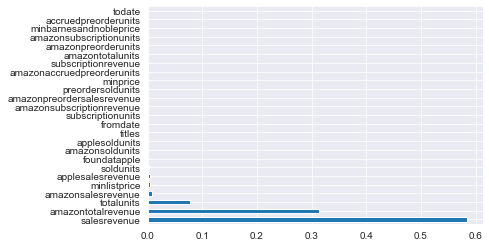

In [44]:
#def Random_forest_model(X_train, y_train,X_val,y_val):
rf_c = RandomForestRegressor()
rf_c.fit(X,y)
score = rf_c.score(X, y)
print("**** TRAINING INFORMATION ****")
print("Accuracy: ", score)
"""score_val_acc = rf_c.score(X_val, y_val)
print("Validation Accuracy: ", score_val_acc) 
print("------------------------------")
print("------------------------------")
print("**** Metrics and Scoring ****")
y_pred_RF = rf_c.predict(X_val)
print(classification_report(y_val, y_pred_RF))
print(confusion_matrix(y_val, y_pred_RF))"""
print(rf_c.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_c.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [45]:
"""train_acc, val_acc = [], [] # Lists for storing accuracies on each fold
n_folds = 5
# Cross validation
kfold = KFold(n_splits=n_folds, shuffle=True, random_state=7)

for train, val in kfold.split(X, y):
    print(train,val)
    X_train, X_val = X[train], X[val] # Grabbing X_train, X_val for Models
    y_train, y_val = y[train], y[val]
    
    rf_model = Random_forest_model(X_train, y_train,X_val,y_val)
    train_acc.append(rf_model[0])
    val_acc.append(rf_model[1])
    #print("TA",train_acc)
    print("Training Accuracy is:", sum(train_acc)/n_folds)
    print("Validation Accuracy is:", sum(val_acc)/n_folds)"""

'train_acc, val_acc = [], [] # Lists for storing accuracies on each fold\nn_folds = 5\n# Cross validation\nkfold = KFold(n_splits=n_folds, shuffle=True, random_state=7)\n\nfor train, val in kfold.split(X, y):\n    print(train,val)\n    X_train, X_val = X[train], X[val] # Grabbing X_train, X_val for Models\n    y_train, y_val = y[train], y[val]\n    \n    rf_model = Random_forest_model(X_train, y_train,X_val,y_val)\n    train_acc.append(rf_model[0])\n    val_acc.append(rf_model[1])\n    #print("TA",train_acc)\n    print("Training Accuracy is:", sum(train_acc)/n_folds)\n    print("Validation Accuracy is:", sum(val_acc)/n_folds)'

In [46]:
"""category = df['amazoncategories'].value_counts()
#author = df['author'].value_counts()
#df_cat_aut = pd.concat([category,author])
category.plot(y='amazon categories',kind="bar",figsize=(10, 10), width=1)"""

'category = df[\'amazoncategories\'].value_counts()\n#author = df[\'author\'].value_counts()\n#df_cat_aut = pd.concat([category,author])\ncategory.plot(y=\'amazon categories\',kind="bar",figsize=(10, 10), width=1)'

In [47]:
import sklearn
print((sklearn.__version__))

0.21.3
